# To explore
We want to determine what is a good indicator for if someone shows up to an appointment or not. Based on this, we want to look at the following
1. If there is any relationship between gender and success
2. Relationship between other individual traits (scholarship, hipertension, diabetes, alcoholism, handcap, sms received) and success
3. If there are any particular neighbourhoods that have a higher level of success
4. If we group them into age brackets, are there any age brackets that are more likely to be successful
5. If there are any particular days or months that are more likely to be successful
6. If repeat patients are more likely to be successful
7. Given the above, can we look at the combination of 2 variables

In [1]:
import pandas as pd
import numpy as np
% matplotlib inline
import seaborn as sns

sns.set_style('darkgrid')

df = pd.read_csv('noshow_clean.csv')

In [2]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,success
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62,Jardim Da Penha,0,1,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56,Jardim Da Penha,0,0,0,0,0,0,1
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62,Mata Da Praia,0,0,0,0,0,0,1
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8,Pontal De Camburi,0,0,0,0,0,0,1
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56,Jardim Da Penha,0,1,1,0,0,0,1


### Generic Functions

In [3]:
# Group by success and a second value and then generate the % success
def generate_simple_analysis(df, groupped_value):
    a = df.groupby(['success', groupped_value]).count()['patient_id']
    a = a.unstack(level = 0)
    a['total'] = a[0] + a[1]
    a['%_success'] = a[1] / a['total']
    return a

## 1. Gender
Is there any relationship between gender and success?

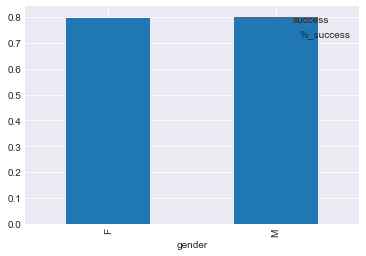

In [4]:
gender_groupped = df.groupby(['success', 'gender']).count()['patient_id']
gender_groupped = gender_groupped.unstack(level = 0)
gender_groupped['total'] = gender_groupped[0] + gender_groupped[1]
gender_groupped['%_success'] = gender_groupped[1] / gender_groupped['total']
gender_groupped[['%_success']].plot.bar()

#### Gender Observations
It looks like there isn't a big difference in the success % between gender and if they turn up to an appointment or not

## 2. Correlations
We want to use pearsons r to find if there are any correlations between success and specific variables

In [5]:
df['scholarship'].corr(df['success'])

-0.029390574536307213

In [6]:
df['hipertension'].corr(df['success'])

0.036175874201493624

In [7]:
df['diabetes'].corr(df['success'])

0.015169351261922566

In [8]:
df['alcoholism'].corr(df['success'])

0.00024458951218007924

In [9]:
df['handcap'].corr(df['success'])

0.007762077995618917

In [10]:
df['sms_received'].corr(df['success'])

-0.1266782067897104

### Summary of other single variables
Everything is pretty weak in terms of correlations. The only one that might be good to explore is the number of sms received, though that looks like it might be a negative correlation

## 3. Neighbourhood
Taking a look at different neighbourhoods to see if there may be a correlation

In [11]:
neighbourhood = df.groupby(['neighbourhood', 'success']).count()
b = neighbourhood['age']
b = b.unstack()

In [12]:
b['total'] = b[1] + b[0]

In [13]:
b.columns = ['no_show','show', 'total']

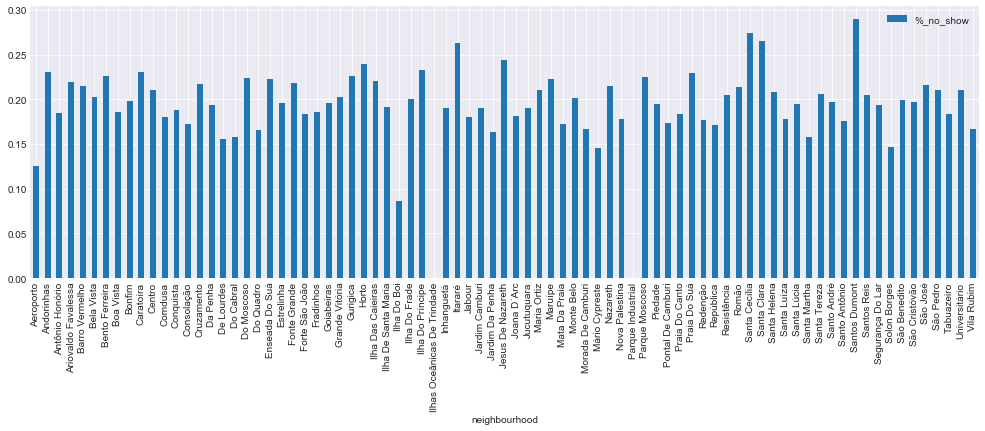

In [14]:
b['%_no_show'] = b['no_show'] / b['total']
b['%_show'] = b['show'] / b['total']
b.fillna(0)
b[['%_no_show']].plot.bar(figsize=(17,5))

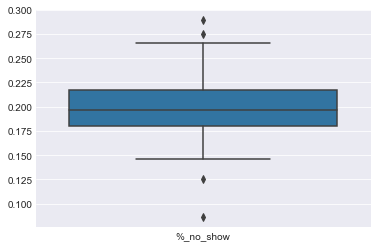

In [15]:
# look at box plot to see if there are any outliers
sns.boxplot(data=b[['%_no_show']])

In [16]:
b[['%_no_show']].describe()

,%_no_show
count,79.000000
mean,0.198028
std,0.031718
min,0.085714
25%,0.180199
50%,0.196721
75%,0.216684
max,0.289639


In [17]:
# Try to get the outliers
# IQR is q3 - q1
iqr = 0.216684 - 0.180199 

# Determine outliers
b[b['%_no_show'] > 0.216684 + (1.5 * iqr)]

,no_show,show,total,%_no_show,%_show
neighbourhood,,,,,
Santa Cecília,123.0,325.0,448.0,0.274554,0.725446
Santos Dumont,369.0,905.0,1274.0,0.289639,0.710361


In [18]:
b[b['%_no_show'] < 0.180199 - (1.5 * iqr)]

,no_show,show,total,%_no_show,%_show
neighbourhood,,,,,
Aeroporto,1.0,7.0,8.0,0.125000,0.875000
Ilha Do Boi,3.0,32.0,35.0,0.085714,0.914286


#### Neighbourhood Observations
We observe from this that in the outliers the neighbourhoods of Santa Cecília and Santos Dumont have a very high % of no shows whilst the neighbourhoods of Aeroporto and Illha Do Boi have a very low % of no shows

## 4. Age

In [19]:
df['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  86,
        91,  98,  92,  94,  96,  93,  95,  97, 102, 115, 100,  99])

In [20]:
age = df[['age', 'success']].copy()

In [21]:
# Group everything into age
def group_age (row):
    if row['age'] <= 20 :
        return '0-20'
    elif row['age'] <= 30:
        return '21-30'
    elif row['age'] <= 40:
        return '31-40'
    elif row['age'] <= 50:
        return '41-50'
    elif row['age'] <= 60:
        return '51-60'
    elif row['age'] <= 70:
        return '61-70'
    elif row['age'] <= 80:
        return '71-80'
    elif row['age'] <= 90:
        return '81-90'
    else:
        return '>90'

In [22]:
age['groupped_age'] = age.apply(lambda row: group_age (row), axis = 1)

In [23]:
groupped_age = age.groupby('groupped_age').count()
groupped_age.drop('age', inplace = True, axis = 1)
groupped_age.columns = ['total']
groupped_age.head()

,total
groupped_age,
0-20,31797
21-30,13771
31-40,15027
41-50,14402
51-60,15639


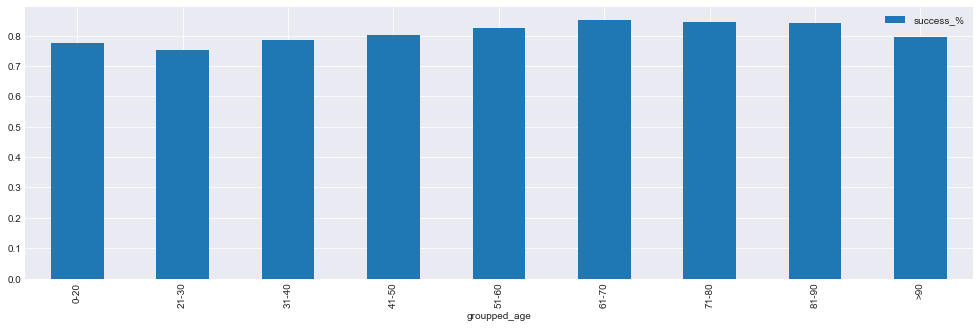

In [24]:
age_success = age.groupby('groupped_age').sum()
groupped_age['success'] = age_success['success']
groupped_age['success_%'] = groupped_age['success'] / groupped_age['total']
import matplotlib.pyplot as plt

ax = groupped_age[['success_%']].plot.bar(figsize=(17,5))

#### Age observations
There is a slight trend, the lowest group is 21-30 with the highest being 61-70

## 5. Time
We want to see if any of the following exists:
1. If there is any correlation between the appointment day and success rate
2. If there is any correlation between the appointment month and success rate
3. If the difference between appointment date and when they set the date indicates a success rate 

### Day vs success

In [25]:
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])

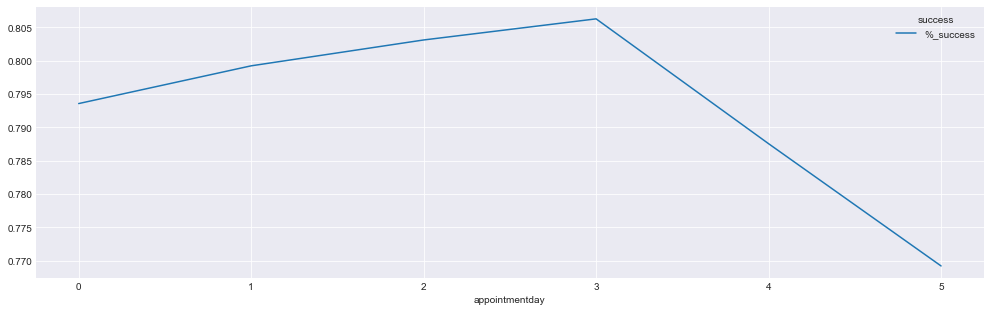

In [26]:
day_of_week = generate_simple_analysis(df, df['appointmentday'].dt.dayofweek)
day_of_week[['%_success']].plot(figsize=(17, 5))

Given that 0 = Monday and 6 = Sunday, we can see that it drops off drastically towards the end of the week - Friday and saturday

### Month vs Success

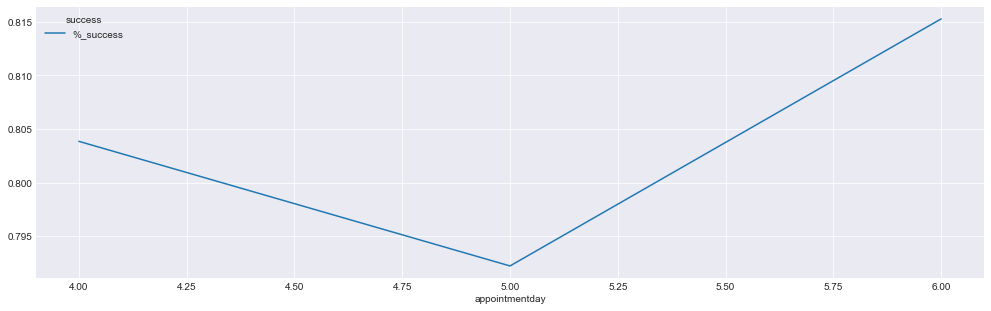

In [27]:
month_of_week = generate_simple_analysis(df, df['appointmentday'].dt.month)
month_of_week[['%_success']].plot(figsize=(17, 5))

We don't have a lot of data here and it looks roughly the same so we're going to ignore this for now

### Difference in appointment and schedule vs success

In [28]:
df['difference'] = df['appointmentday'].dt.date - df['scheduled_day'].dt.date

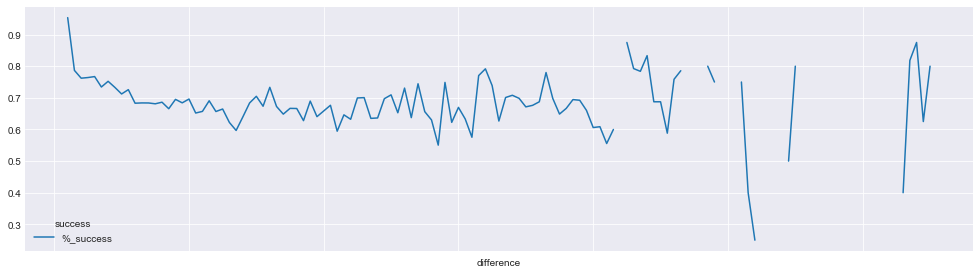

In [29]:
difference = generate_simple_analysis(df, 'difference')
difference[['%_success']].plot(figsize=(17, 5))

#### Time Observations
We can see that there is a significant drop in success rates during Friday and Saturday
There is no indication of monthly trends (not enough data)
difference in day?? # Todo

## 6. Repeat patients
Are repeat patients more likely to be successful?

In [30]:
# number of unique patients
len(df.patient_id.unique())

62190

In [31]:
# Total bookings
df.patient_id.count()

110327

In [32]:
# We can see there are patients who have booked more than once
df['repeat'] = df['patient_id'].duplicated()

# We only want the last booking of repeat customers
df.drop_duplicates(subset = 'patient_id', keep = 'last', inplace = True)

In [33]:
repeat = generate_simple_analysis(df, 'repeat')
# repeat[['%_success']].plot.bar(figsize=(17, 5))
repeat

success,0,1,total,%_success
repeat,,,,
False,7106,30751,37857,0.812294
True,5097,19236,24333,0.790531


#### Repeat patient observations
There isn't really a difference in success for a repeat patient

## Multi Variable Analysis
The following we have seen have impact on the success rate and we will dive deeper into them:
- Day of appointment
- Neighbourhood
- Groupped age

In [34]:
success = df[df['success'] == 1].copy()

### Day of appointment and Neighbourhood Success Rate

In [35]:
a1 = success.groupby(['neighbourhood', success.appointmentday.dt.dayofweek]).count()['patient_id']
a1 = a1.unstack(level = 1)
a1.fillna(0, inplace = True)
# a1['total'] = a1[0] + a1[1]
# a1['%_success'] = a1[1] / a1['total']
# a1[['%_success']].plot.bar(figsize=(17, 5))
# a1.plot.scatter(x = 'appointmentday', y = 'neighbourhood')
a1

appointmentday,0,1,2,3,4,5
neighbourhood,,,,,,
Aeroporto,1.0,1.0,0.0,2.0,2.0,0.0
Andorinhas,185.0,206.0,206.0,114.0,181.0,0.0
Antônio Honório,32.0,34.0,37.0,31.0,14.0,0.0
Ariovaldo Favalessa,21.0,29.0,33.0,24.0,29.0,4.0
Barro Vermelho,34.0,42.0,41.0,24.0,37.0,0.0
Bela Vista,166.0,229.0,211.0,151.0,128.0,0.0
Bento Ferreira,92.0,77.0,88.0,56.0,72.0,0.0
Boa Vista,27.0,37.0,37.0,23.0,30.0,0.0
Bonfim,313.0,279.0,337.0,199.0,170.0,0.0


### Groupped Age and Neighbourhood Success Rate

### Day of Appointment and Groupped age Success Rate